In [1]:
# Import Libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split    # To split the dataset into train and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder   # For scaling and encoding categorical variables
from sklearn.compose import ColumnTransformer           # To apply transformers to specific columns
from sklearn.impute import SimpleImputer                # For handling missing data
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.svm import SVC                            # Support Vector Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score # For evaluating the model
import joblib
from xgboost import XGBClassifier



In [2]:
# import the data to dataframe
hr_data = pd.read_csv('resources/HR-Employee-Attrition.csv')
hr_data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
#examine the data
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
hr_data["Attrition"].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [5]:
#convert the target variable to binary
hr_data['Attrition'] = hr_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) 


In [6]:
#check to see if target variable is binary
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#list columns with object data type
hr_data.select_dtypes(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [8]:
# get dummies for the rest of the categorical columns
catergorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus','OverTime', 'Over18', 'Gender']
hr_data_encoded = pd.get_dummies(hr_data, columns=catergorical_cols, drop_first=True)

In [9]:
#check encoded data to assure datatype change to int
hr_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

### Correlation Matrixx

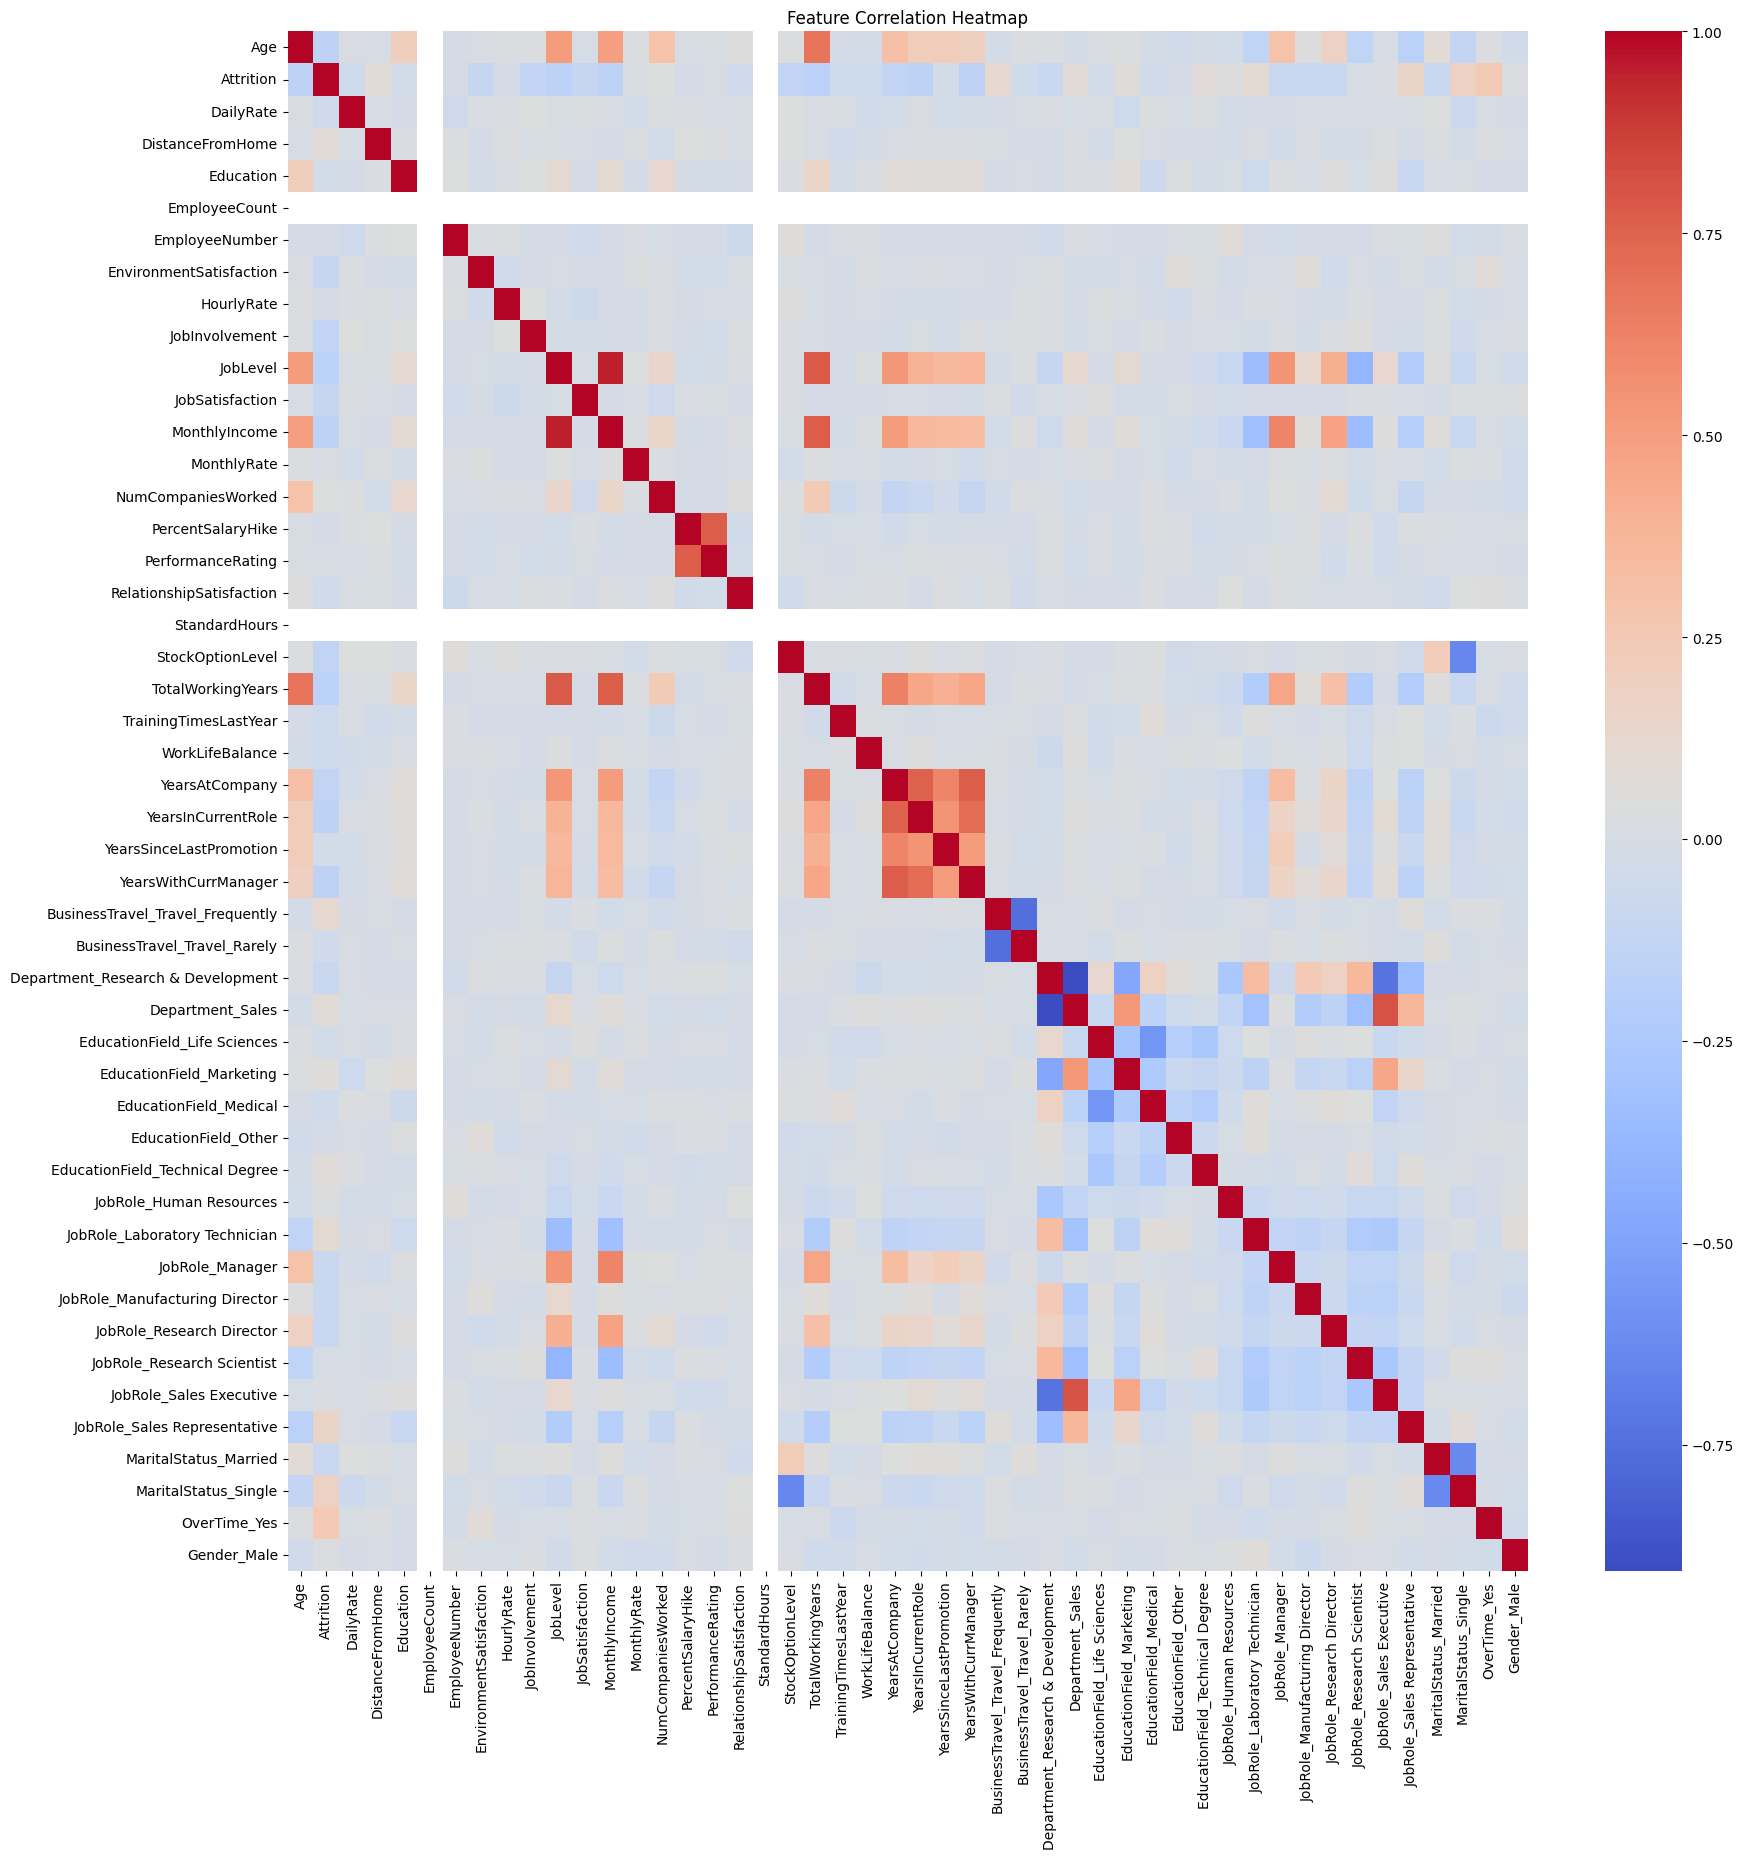

In [10]:
#view correlation of the features
correlation_matrix = hr_data_encoded.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
# view correlation of features and attrition
attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)
print(attrition_corr)

Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

In [12]:
# Assign X (data) and y (target)
X = hr_data.drop(columns='Attrition')
y = hr_data['Attrition']

#train, test and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# review y_train value counts
y_train.value_counts()

Attrition
0    913
1    189
Name: count, dtype: int64

In [14]:
#one hot encode the categorical columns
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18', 'Gender']
encoder = OneHotEncoder()

X_train_OHE = encoder.fit_transform(X_train[categorical_cols])
X_test_OHE  = encoder.transform(X_test[categorical_cols])

In [15]:
#run standard scaler on X_train 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])


In [16]:
print(y_test.value_counts())
print(y_train.value_counts())

Attrition
0    320
1     48
Name: count, dtype: int64
Attrition
0    913
1    189
Name: count, dtype: int64


In [17]:
#combine the scaled numerical columns and the one hot encoded columns
#X_train_final = np.concatenate([X_train_scaled, X_train_OHE.toarray()], axis=1)
X_train_combined = pd.concat([
    pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index),
    pd.DataFrame(X_train_OHE.toarray(), columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
], axis=1)

X_test_combined = pd.concat([
    pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index),
    pd.DataFrame(X_test_OHE.toarray(), columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)
], axis=1)

X_train_combined.head() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Over18_Y,Gender_Female,Gender_Male
1343,-0.852159,-0.508455,-0.285906,0.094018,0.0,1.419614,1.190392,-0.374600,0.393923,-0.934008,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1121,-0.093088,0.209318,-1.017204,1.053349,0.0,0.928104,-0.641748,0.309668,0.393923,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1048,-0.309965,1.295810,-0.773438,0.094018,0.0,0.751623,1.190392,0.700678,-2.415809,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1393,-1.069036,0.381387,-0.042139,0.094018,0.0,1.554862,1.190392,-1.107744,0.393923,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
527,-0.526843,0.319933,0.079744,0.094018,0.0,-0.495295,1.190392,-0.570105,0.393923,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [18]:
X_train_combined.dtypes

Age                                  float64
DailyRate                            float64
DistanceFromHome                     float64
Education                            float64
EmployeeCount                        float64
EmployeeNumber                       float64
EnvironmentSatisfaction              float64
HourlyRate                           float64
JobInvolvement                       float64
JobLevel                             float64
JobSatisfaction                      float64
MonthlyIncome                        float64
MonthlyRate                          float64
NumCompaniesWorked                   float64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StandardHours                        float64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBalance                      float64
YearsAtCom

# Feature Importance


In [19]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_combined, y_train)

columns_combined = encoder.get_feature_names_out()
feature_importance = rf_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X_train_combined.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importances)



                              Feature  Importance
11                      MonthlyIncome    0.076717
0                                 Age    0.052157
19                  TotalWorkingYears    0.049065
1                           DailyRate    0.047953
5                      EmployeeNumber    0.046931
22                     YearsAtCompany    0.043308
51                       OverTime_Yes    0.041561
12                        MonthlyRate    0.038083
7                          HourlyRate    0.037574
2                    DistanceFromHome    0.037020
25               YearsWithCurrManager    0.032625
13                 NumCompaniesWorked    0.032591
50                        OverTime_No    0.031393
14                  PercentSalaryHike    0.029262
23                 YearsInCurrentRole    0.027247
18                   StockOptionLevel    0.026014
6             EnvironmentSatisfaction    0.025064
24            YearsSinceLastPromotion    0.023716
20              TrainingTimesLastYear    0.023162


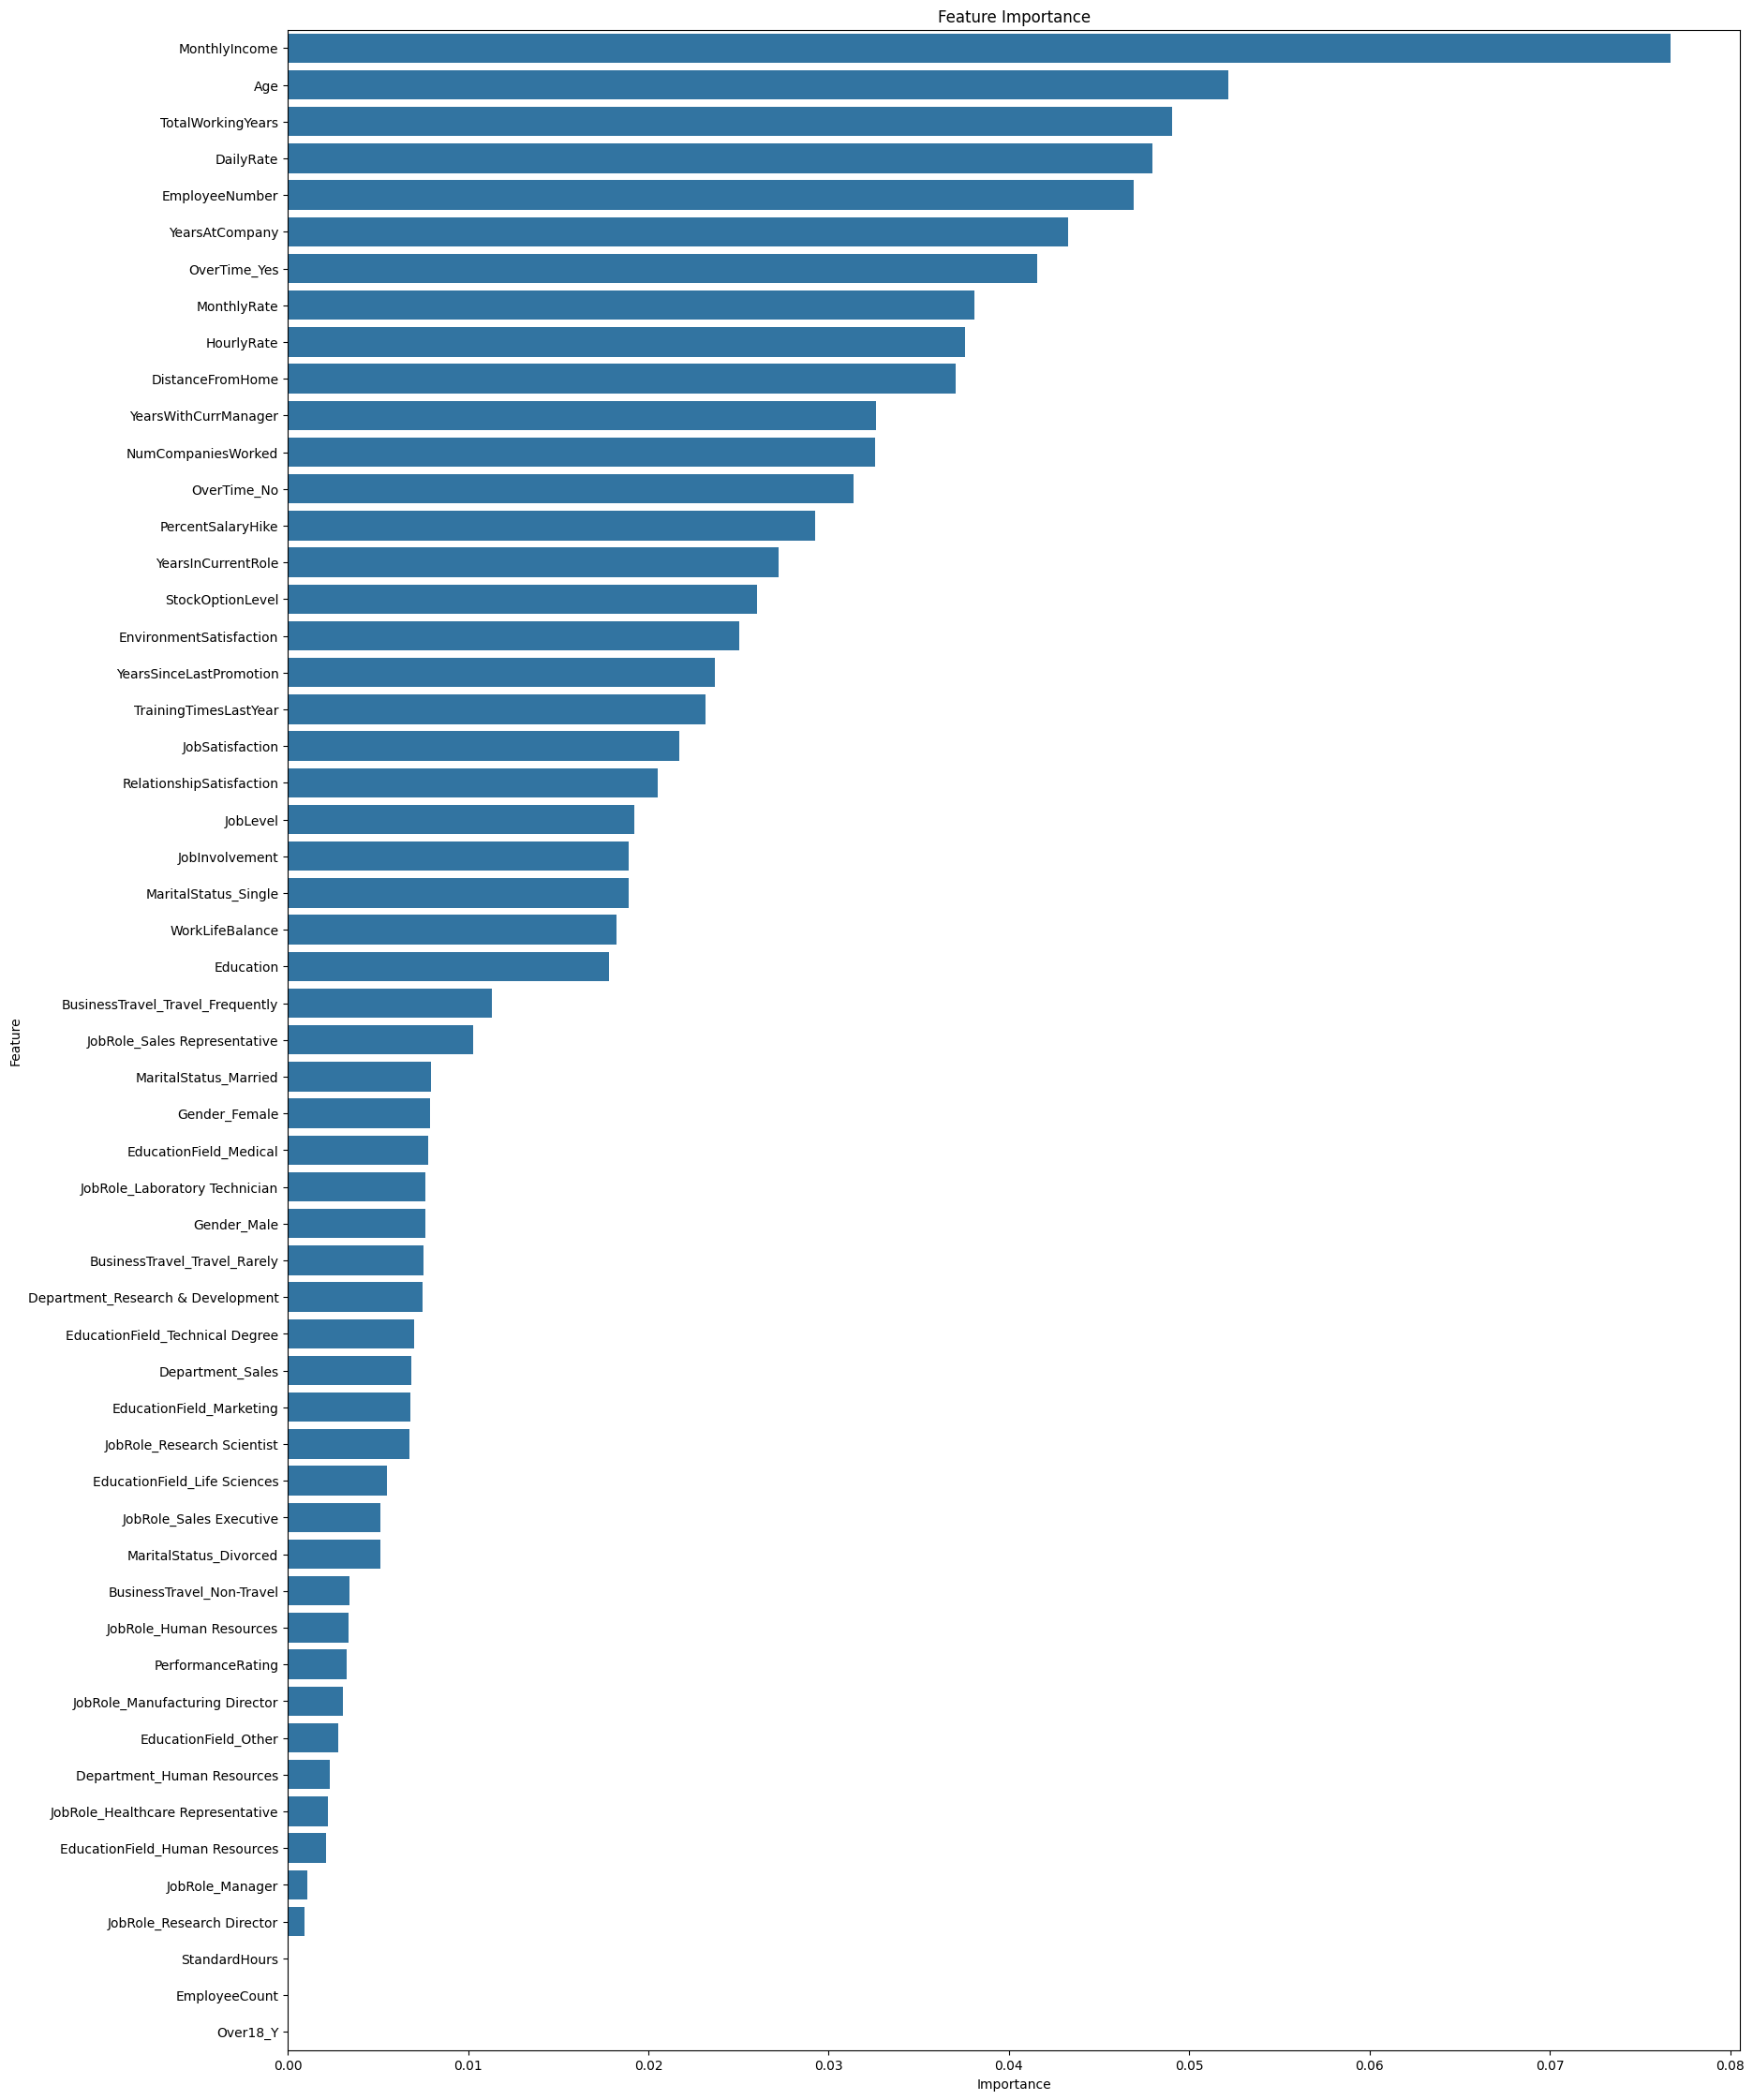

In [20]:
plt.figure(figsize=(20, 28))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()

In [21]:
irrelevant_features = feature_importances[feature_importances['Importance'] < 0.02]['Feature'].values
print(irrelevant_features)

['JobLevel' 'JobInvolvement' 'MaritalStatus_Single' 'WorkLifeBalance'
 'Education' 'BusinessTravel_Travel_Frequently'
 'JobRole_Sales Representative' 'MaritalStatus_Married' 'Gender_Female'
 'EducationField_Medical' 'JobRole_Laboratory Technician' 'Gender_Male'
 'BusinessTravel_Travel_Rarely' 'Department_Research & Development'
 'EducationField_Technical Degree' 'Department_Sales'
 'EducationField_Marketing' 'JobRole_Research Scientist'
 'EducationField_Life Sciences' 'JobRole_Sales Executive'
 'MaritalStatus_Divorced' 'BusinessTravel_Non-Travel'
 'JobRole_Human Resources' 'PerformanceRating'
 'JobRole_Manufacturing Director' 'EducationField_Other'
 'Department_Human Resources' 'JobRole_Healthcare Representative'
 'EducationField_Human Resources' 'JobRole_Manager'
 'JobRole_Research Director' 'StandardHours' 'EmployeeCount' 'Over18_Y']


In [22]:
X_train_filtered = X_train_combined.drop(columns=irrelevant_features)
X_test_filtered = X_test_combined.drop(columns=irrelevant_features)

print(len(X_train_filtered.columns))
print(len(X_test_filtered.columns))

print(f"y_train = " , y_train.value_counts())

21
21
y_train =  Attrition
0    913
1    189
Name: count, dtype: int64


# Resampling

### Smoteen

In [23]:
# Import SMOTEEN from imblearn
from imblearn.combine import SMOTEENN

# Instantiate the SMOTEENN instance
smote_enn = SMOTEENN(random_state=1)

# Fit the model to the training data
X_smoteen_train_resampled, y_smoteen_train_resampled = smote_enn.fit_resample(X_train_filtered, y_train)

# fit on test data
X_smoteen_test_resampled, y_smoteen_test_resampled = smote_enn.fit_resample(X_test_filtered, y_test)

print(f"Train size:", y_smoteen_train_resampled.value_counts())
print("--------")
print(f"Test Size:", y_smoteen_test_resampled.value_counts())

Train size: Attrition
1    884
0    445
Name: count, dtype: int64
--------
Test Size: Attrition
1    316
0    149
Name: count, dtype: int64


### ADASYN

In [24]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(sampling_strategy='minority', random_state=1)


X_ada_train_resampled, y_ada_train_resampled = ada.fit_resample(X_train_filtered, y_train)
X_ada_test_resampled, y_ada_test_resampled = ada.fit_resample(X_test_filtered, y_test)

#changed name to smoteen to test without changing other code, will change back to ada
# X_smoteen_train_resampled, y_smoteen_train_resampled = ada.fit_resample(X_train_filtered, y_train)
# X_smoteen_test_resampled, y_smoteen_test_resampled = ada.fit_resample(X_test_filtered, y_test)


print(f"Train size:", y_ada_train_resampled.value_counts())
print("--------")
print(f"Test Size:", y_ada_test_resampled.value_counts())

Train size: Attrition
0    913
1    899
Name: count, dtype: int64
--------
Test Size: Attrition
0    320
1    315
Name: count, dtype: int64


### Testing resamples

In [25]:
# Create a RandomForestClassifier instance to the original data
model = RandomForestClassifier()
model.fit(X_train_filtered, y_train)

# Predict labels for resampled testing features
y_pred = model.predict(X_test_filtered)


In [26]:
# Create an instance and fit it to the resamples data
smt_resampled_model = RandomForestClassifier()
smt_resampled_model.fit(X_smoteen_train_resampled, y_smoteen_train_resampled)

y_pred_resampled_smt = smt_resampled_model.predict(X_smoteen_test_resampled)  

In [27]:
# Create an instance and fit it to the resamples data
ada_resampled_model = RandomForestClassifier()
ada_resampled_model.fit(X_ada_train_resampled, y_ada_train_resampled)

y_pred_resampled_ada = ada_resampled_model.predict(X_ada_test_resampled)  

In [28]:
# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
#print("---------")
print(f"Classification Report - Resampled Data - SMOTEENN")
print(classification_report(y_smoteen_test_resampled, y_pred_resampled_smt))
# print("---------")
print(f"Classification Report - Resampled Data - ADASYN")
print(classification_report(y_ada_test_resampled, y_pred_resampled_ada))

Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.56      0.10      0.18        48

    accuracy                           0.87       368
   macro avg       0.72      0.55      0.55       368
weighted avg       0.84      0.87      0.83       368

Classification Report - Resampled Data - SMOTEENN
              precision    recall  f1-score   support

           0       0.66      0.83      0.73       149
           1       0.91      0.80      0.85       316

    accuracy                           0.81       465
   macro avg       0.78      0.81      0.79       465
weighted avg       0.83      0.81      0.81       465

Classification Report - Resampled Data - ADASYN
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       320
           1       0.93      0.71      0.81       315

    accuracy                           0.83   

# Tuning/ Confusion Matrix


## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

untuned_model = KNeighborsClassifier()
grid_tuned_model = KNeighborsClassifier()
random_tuned_model = KNeighborsClassifier()

target_names = ['Class 0', 'Class 1']


### Untuned report/CM

In [30]:
from sklearn.metrics import classification_report

untuned_model.fit(X_smoteen_train_resampled, y_smoteen_train_resampled)
untuned_y_pred = untuned_model.predict(X_smoteen_test_resampled)
print(classification_report(y_smoteen_test_resampled, untuned_y_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.57      0.49      0.53       149
     Class 1       0.77      0.82      0.80       316

    accuracy                           0.72       465
   macro avg       0.67      0.66      0.66       465
weighted avg       0.71      0.72      0.71       465



In [31]:
untuned_model.fit(X_ada_train_resampled, y_ada_train_resampled)
untuned_y_pred_ada = untuned_model.predict(X_ada_test_resampled)
print(classification_report(y_ada_test_resampled, untuned_y_pred_ada,
                            target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.66      0.63      0.64       320
     Class 1       0.64      0.67      0.65       315

    accuracy                           0.65       635
   macro avg       0.65      0.65      0.65       635
weighted avg       0.65      0.65      0.65       635



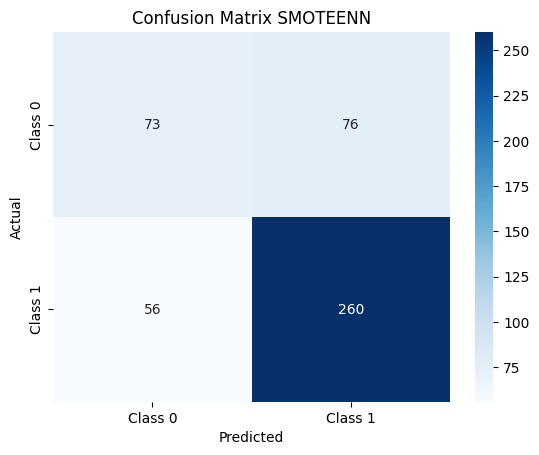

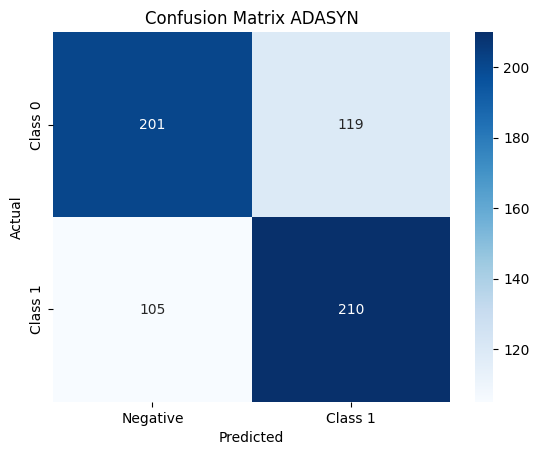

In [32]:
# 2. Generate the confusion matrix
cm_untuned_smt = confusion_matrix(y_smoteen_test_resampled, untuned_y_pred)

# 3. Plot the confusion matrix using a heatmap
sns.heatmap(cm_untuned_smt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SMOTEENN')
plt.show()

# 2. Generate the confusion matrix
cm_untuned_ada = confusion_matrix(y_ada_test_resampled, untuned_y_pred_ada)

# 3. Plot the confusion matrix using a heatmap
sns.heatmap(cm_untuned_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ADASYN')
plt.show()

### Gridsearch Tuning/ CM

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1, 3),
    'weights': ['uniform'],
    'leaf_size': np.arange(1, 10)
}

grid_clf = GridSearchCV(grid_tuned_model, param_grid, verbose=3)

grid_clf.fit(X_ada_train_resampled, y_ada_train_resampled)

Fitting 5 folds for each of 580 candidates, totalling 2900 fits
[CV 1/5] END leaf_size=1, n_neighbors=1, weights=uniform;, score=0.857 total time=   0.0s
[CV 2/5] END leaf_size=1, n_neighbors=1, weights=uniform;, score=0.865 total time=   0.0s
[CV 3/5] END leaf_size=1, n_neighbors=1, weights=uniform;, score=0.862 total time=   0.0s
[CV 4/5] END leaf_size=1, n_neighbors=1, weights=uniform;, score=0.878 total time=   0.0s
[CV 5/5] END leaf_size=1, n_neighbors=1, weights=uniform;, score=0.865 total time=   0.0s
[CV 1/5] END leaf_size=1, n_neighbors=1, weights=distance;, score=0.857 total time=   0.0s
[CV 2/5] END leaf_size=1, n_neighbors=1, weights=distance;, score=0.865 total time=   0.0s
[CV 3/5] END leaf_size=1, n_neighbors=1, weights=distance;, score=0.862 total time=   0.0s
[CV 4/5] END leaf_size=1, n_neighbors=1, weights=distance;, score=0.878 total time=   0.0s
[CV 5/5] END leaf_size=1, n_neighbors=1, weights=distance;, score=0.865 total time=   0.0s
[CV 1/5] END leaf_size=1, n_nei

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [34]:
# bets Parameters
print(grid_clf.best_params_)

{'leaf_size': np.int64(1), 'n_neighbors': np.int64(2), 'weights': 'uniform'}


In [35]:
# Print the classification report for the best model
grid_y_pred = grid_clf.predict(X_ada_test_resampled)
print(classification_report(y_ada_test_resampled, grid_y_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.57      0.83      0.68       320
     Class 1       0.68      0.37      0.48       315

    accuracy                           0.60       635
   macro avg       0.63      0.60      0.58       635
weighted avg       0.63      0.60      0.58       635



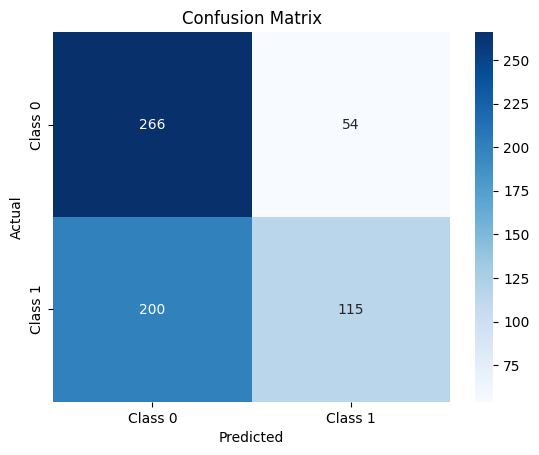

In [36]:
# 2. Generate the confusion matrix
cm_grid = confusion_matrix(y_ada_test_resampled, grid_y_pred)

# 3. Plot the confusion matrix using a heatmap
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### RandomSearch Tuning/ CM

In [37]:
# Create the randomized search estimator
from sklearn.model_selection import RandomizedSearchCV

param_random = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'leaf_size': np.arange(1, 500, 50)
}

random_clf = RandomizedSearchCV(random_tuned_model, param_random, random_state=0, verbose=3)

random_clf.fit(X_ada_train_resampled, y_ada_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END leaf_size=151, n_neighbors=17, weights=uniform;, score=0.738 total time=   0.0s
[CV 2/5] END leaf_size=151, n_neighbors=17, weights=uniform;, score=0.741 total time=   0.0s
[CV 3/5] END leaf_size=151, n_neighbors=17, weights=uniform;, score=0.735 total time=   0.0s
[CV 4/5] END leaf_size=151, n_neighbors=17, weights=uniform;, score=0.718 total time=   0.0s
[CV 5/5] END leaf_size=151, n_neighbors=17, weights=uniform;, score=0.738 total time=   0.0s
[CV 1/5] END leaf_size=401, n_neighbors=2, weights=distance;, score=0.857 total time=   0.0s
[CV 2/5] END leaf_size=401, n_neighbors=2, weights=distance;, score=0.865 total time=   0.0s
[CV 3/5] END leaf_size=401, n_neighbors=2, weights=distance;, score=0.862 total time=   0.0s
[CV 4/5] END leaf_size=401, n_neighbors=2, weights=distance;, score=0.878 total time=   0.0s
[CV 5/5] END leaf_size=401, n_neighbors=2, weights=distance;, score=0.865 total time=   0.0s
[CV 1/5] 

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'weights': ['uniform', 'distance']},
                   random_state=0, verbose=3)

In [38]:
print(random_clf.best_params_)

{'weights': 'uniform', 'n_neighbors': np.int64(2), 'leaf_size': np.int64(101)}


In [39]:
# Make predictions with the hypertuned model
random_tuned_pred = random_clf.predict(X_ada_test_resampled)

# Calculate the classification report
print(classification_report(y_ada_test_resampled, random_tuned_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.57      0.83      0.68       320
     Class 1       0.68      0.37      0.48       315

    accuracy                           0.60       635
   macro avg       0.63      0.60      0.58       635
weighted avg       0.63      0.60      0.58       635



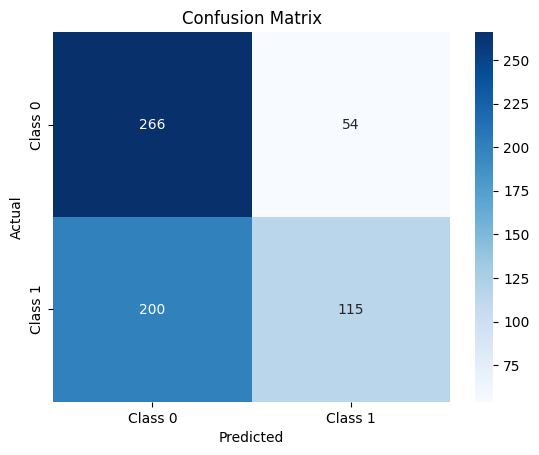

In [40]:
# 2. Generate the confusion matrix
cm_rand = confusion_matrix(y_ada_test_resampled, random_tuned_pred)

# 3. Plot the confusion matrix using a heatmap
sns.heatmap(cm_rand, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# XGBoost
- KNeighborsClassifier might not be ideal for this dataset due to its sensitivity to class imbalance. 

### Smoteen data

In [41]:
xgb_model_smt = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model_smt.fit(X_smoteen_train_resampled, y_smoteen_train_resampled)
y_pred_xgb_smt = xgb_model_smt.predict(X_smoteen_test_resampled)
print(classification_report(y_smoteen_test_resampled, y_pred_xgb_smt))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       149
           1       0.91      0.86      0.88       316

    accuracy                           0.85       465
   macro avg       0.82      0.84      0.83       465
weighted avg       0.85      0.85      0.85       465



### ADA data

In [42]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_ada_train_resampled, y_ada_train_resampled)
y_pred_xgb = xgb_model.predict(X_ada_test_resampled)
print(classification_report(y_ada_test_resampled, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       320
           1       0.94      0.79      0.86       315

    accuracy                           0.87       635
   macro avg       0.88      0.87      0.87       635
weighted avg       0.88      0.87      0.87       635



### XGBoost Matrix

Confusion Matrix for the smoteen:
TN = 122, FP = 27, FN = 45, TP = 271


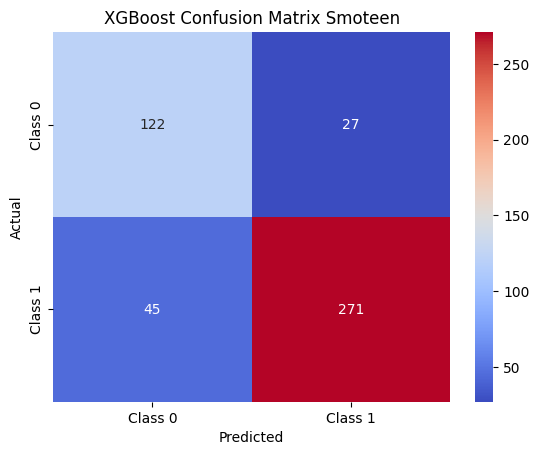

Confusion Matrix for the Adasyn:
TN = 304, FP = 16, FN = 65, TP = 250


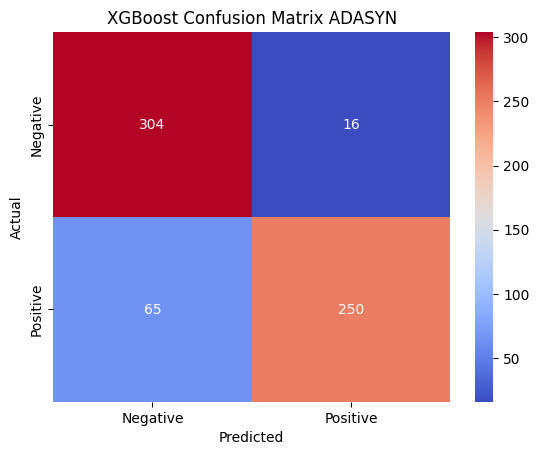

In [43]:
# 2. Generate the confusion matrix
cm_xg_smt = confusion_matrix(y_smoteen_test_resampled, y_pred_xgb_smt)

TN_s, FP_s, FN_s, TP_s = cm_xg_smt.ravel()

print(f"Confusion Matrix for the smoteen:")
print(f"TN = {TN_s}, FP = {FP_s}, FN = {FN_s}, TP = {TP_s}")


# 3. Plot the confusion matrix using a heatmap
sns.heatmap(cm_xg_smt, annot=True, fmt=".0f", cmap='coolwarm', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix Smoteen')
plt.show()



# 2. Generate the confusion matrix
cm_xg = confusion_matrix(y_ada_test_resampled, y_pred_xgb)

TN, FP, FN, TP = cm_xg.ravel()
print(f"Confusion Matrix for the Adasyn:")
print(f"TN = {TN}, FP = {FP}, FN = {FN}, TP = {TP}")

# 3. Plot the confusion matrix using a heatmap
sns.heatmap(cm_xg, annot=True, fmt=".0f", cmap='coolwarm', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix ADASYN')
plt.show()

In [44]:
from xgboost import DMatrix, cv
import xgboost as xgb

# Convert data to DMatrix (XGBoost's native data format)
dtrain = DMatrix(X_ada_train_resampled, label=y_ada_train_resampled)


# Define parameter grid
param = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Perform cross-validation
cv_results = cv(
    params=param,
    dtrain=dtrain,
    num_boost_round=100,
    nfold=5,
    metrics='auc',
    early_stopping_rounds=10,
    verbose_eval=True
)

print(cv_results)
# param_grid_xg = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0]}

# grid_search = GridSearchCV(
#     estimator=XGBClassifier(random_state=42),
#     param_grid=param_grid_xg,
#     scoring='accuracy',
#     cv=5,
#     verbose=3)

# grid_search.fit(X_ada_train_resampled, y_ada_train_resampled)

[0]	train-auc:0.92294+0.00369	test-auc:0.89065+0.01599
[1]	train-auc:0.93933+0.00192	test-auc:0.91329+0.01392
[2]	train-auc:0.94622+0.00135	test-auc:0.92059+0.01466
[3]	train-auc:0.95066+0.00090	test-auc:0.92297+0.01265
[4]	train-auc:0.95280+0.00170	test-auc:0.92554+0.01184
[5]	train-auc:0.95586+0.00090	test-auc:0.92702+0.01059
[6]	train-auc:0.95869+0.00139	test-auc:0.92933+0.01041
[7]	train-auc:0.96095+0.00230	test-auc:0.93020+0.01034
[8]	train-auc:0.96462+0.00237	test-auc:0.93361+0.01082
[9]	train-auc:0.96664+0.00211	test-auc:0.93511+0.00975
[10]	train-auc:0.96843+0.00194	test-auc:0.93661+0.00953
[11]	train-auc:0.96946+0.00235	test-auc:0.93794+0.00948
[12]	train-auc:0.97148+0.00199	test-auc:0.94034+0.00964
[13]	train-auc:0.97328+0.00196	test-auc:0.94284+0.00850
[14]	train-auc:0.97509+0.00163	test-auc:0.94384+0.00806
[15]	train-auc:0.97654+0.00166	test-auc:0.94561+0.00773
[16]	train-auc:0.97800+0.00172	test-auc:0.94667+0.00733
[17]	train-auc:0.97941+0.00161	test-auc:0.94685+0.00757
[1

In [45]:
param_grid_xg = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid_xg,
    scoring='accuracy',
    cv=5,
    verbose=3)

grid_search.fit(X_ada_train_resampled, y_ada_train_resampled)
print(grid_search.best_params_)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# xg_model = XGBClassifier(random_state=42)
# rf_model.fit(X_train_combined, y_train)

# columns_combined = encoder.get_feature_names_out()
# feature_importance = rf_model.feature_importances_


columns_combined = encoder.get_feature_names_out()
feature_importance = xgb_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X_ada_test_resampled.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

### Logistic Regression

In [ ]:
log_reg_smt = LogisticRegression(penalty='l2', solver='saga', max_iter=1000)
log_reg_smt.fit(X_smoteen_train_resampled, y_smoteen_train_resampled)
y_pred_lr_smt = log_reg_smt.predict(X_smoteen_test_resampled)
print(classification_report(y_smoteen_test_resampled, y_pred_lr_smt))

In [ ]:
log_reg = LogisticRegression(penalty='l2', solver='saga', max_iter=1000)
log_reg.fit(X_ada_train_resampled, y_ada_train_resampled)
y_pred_lr = log_reg.predict(X_ada_test_resampled)
print(classification_report(y_ada_test_resampled, y_pred_lr))

In [ ]:

cm_lr_smt = confusion_matrix(y_smoteen_test_resampled, y_pred_lr_smt)

# 3. Plot the confusion matrix using a heatmap
sns.heatmap(cm_lr_smt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix SMOTEENN')
plt.show()


# 2. Generate the confusion matrix
cm_lr = confusion_matrix(y_ada_test_resampled, y_pred_lr)

# 3. Plot the confusion matrix using a heatmap
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix ADASYN')
plt.show()